# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




<>:55: SyntaxWarning:

invalid escape sequence '\$'

<>:55: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\lilla\AppData\Local\Temp\ipykernel_34628\1842324635.py:55: SyntaxWarning:

invalid escape sequence '\$'



id                                               name  host_id  \
0   6983                               Copenhagen 'N Livin'    16774   
1  26057                Lovely house - most attractive area   109777   
2  26473          City Centre Townhouse Sleeps 1-10 persons   112210   
3  29118                    Best Location in Cool Istedgade   125230   
4  31094  Beautiful, spacious, central, renovated Penthouse   129976   

  host_name     neighbourhood_cleansed   latitude  longitude        room_type  \
0     Simon                   Nørrebro  55.686410  12.547410  Entire home/apt   
1      Kari                   Indre By  55.693070  12.576490  Entire home/apt   
2     Julia                   Indre By  55.676020  12.575400  Entire home/apt   
3      Nana  Vesterbro-Kongens Enghave  55.670230  12.555040  Entire home/apt   
4      Ebbe  Vesterbro-Kongens Enghave  55.666602  12.555283  Entire home/apt   

    price  minimum_nights  ...  review_scores_accuracy  \
0   898.0               3  ...                    4.79   
1  2600.0               4  ...                    4.93   
2  3250.0               3  ...                    4.63   
3   725.0               7  ...                    4.87   
4  1954.0               3  ...                    4.82   

  review_scores_cleanliness  review_scores_checkin  \
0                      4.78                   4.86   
1                      4.96                   4.93   
2                      4.44                   4.78   
3                      4.73                   5.00   
4                      4.88                   4.87   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.89                    4.73                 4.71   
1                         4.86                    4.94                 4.81   
2                         4.70                    4.89                 4.59   
3                         5.00                    4.87                 4.80   
4                         4.82                    4.80                 4.53   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               1.08                               1                 0   
1               0.55                               1               303   
2               2.06                               3                56   
3               0.16                               1                59   
4               0.13                               1                 0   

   price_category  
0               0  
1               1  
2               1  
3               0  
4               1  

[5 rows x 23 columns]

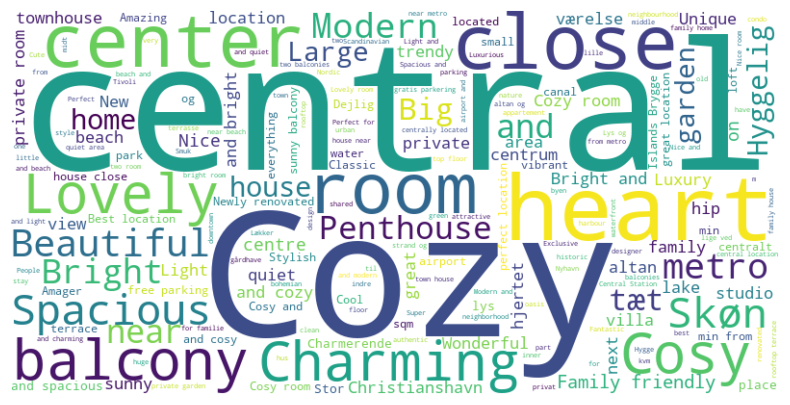

In [21]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

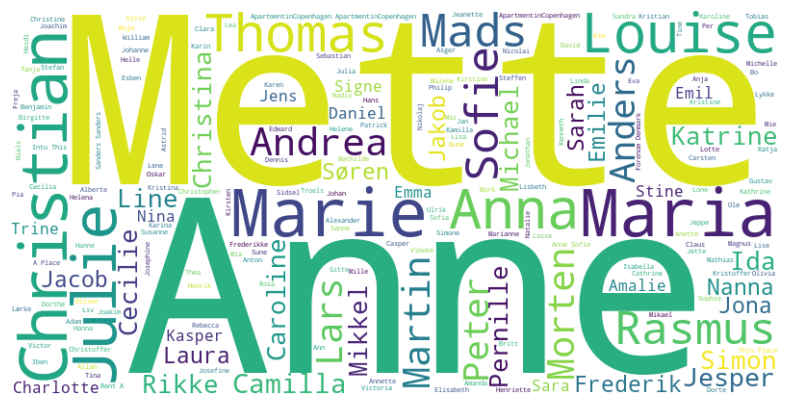

In [22]:
# State your solution here. Add more cells if needed.

# Convert the 'name' column to a single string
hosts_to_string = ' '.join(data_filtered['host_name'].astype(str))

# Stop words - are excluded
stop_words = ['&','og','OG','Og','+','and','And', 'AND', '/']

# Generate a wordcloud
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(hosts_to_string)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [23]:
import plotly.express as px
#
#  thanks to stack overflow: https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6

df = data_filtered[['latitude', 'longitude', 'neighbourhood_cleansed', 'price', 'name', 'minimum_nights', 'review_scores_rating']]
fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="name", 
                        hover_data=["price", "minimum_nights", "review_scores_rating", "neighbourhood_cleansed"],
                        color="price",
                        size="price",
                        zoom=10, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

In [24]:
import plotly.express as px
import pandas as pd
import numpy as np

# Assuming data_filtered is your original DataFrame
data = data_filtered[['neighbourhood_cleansed', 'price']]

# First, prepare the data by reshaping it (pivoting)
data = data.copy()
data['row'] = data.groupby('neighbourhood_cleansed').cumcount()
df_pivot = data.pivot(index='row', columns='neighbourhood_cleansed', values='price')
df_pivot = df_pivot.reset_index(drop=True)
df_pivot = df_pivot.dropna(how='any')
df_pivot.rename(columns={'Vesterbro-Kongens Enghave': 'Vesterbro'}, inplace=True)

# Convert the pivoted DataFrame into a long format
df_long = df_pivot.melt(var_name='Neighbourhood', value_name='Price')

# Boxplot 1: Prices across neighbourhoods
fig1 = px.box(df_long, x='Neighbourhood', y='Price',  hover_data=['Price'],
              title="Housing Listing Prices in Copenhagen", 
              labels={"Price": "Price (DKK)"})

fig1.update_layout(xaxis_title='Neighbourhood', yaxis_title='Price (DKK)', xaxis_tickangle=45)
fig1.show()

# Boxplot 2: Review scores for location
data2 = data_filtered[['neighbourhood_cleansed', 'review_scores_location']]
data2 = data2.copy()
data2['row'] = data2.groupby('neighbourhood_cleansed').cumcount()
df_pivot2 = data2.pivot(index='row', columns='neighbourhood_cleansed', values='review_scores_location')
df_pivot2 = df_pivot2.reset_index(drop=True)
df_pivot2 = df_pivot2.dropna(how='any')
df_pivot2.rename(columns={'Vesterbro-Kongens Enghave': 'Vesterbro'}, inplace=True)

df_long2 = df_pivot2.melt(var_name='Neighbourhood', value_name='Review Scores')

fig2 = px.box(df_long2, x='Neighbourhood', y='Review Scores', hover_data=['Review Scores'],
              title="Review Scores by Location",
              labels={"Review Scores": "Review Scores"})

fig2.update_layout(xaxis_title='Neighbourhood', yaxis_title='Review Scores', xaxis_tickangle=45)
fig2.show()

# Boxplot 3: Amount of reviews per area on a monthly basis
data3 = data_filtered[['neighbourhood_cleansed', 'reviews_per_month']]
data3 = data3.copy()
data3['row'] = data3.groupby('neighbourhood_cleansed').cumcount()
df_pivot3 = data3.pivot(index='row', columns='neighbourhood_cleansed', values='reviews_per_month')
df_pivot3 = df_pivot3.reset_index(drop=True)
df_pivot3 = df_pivot3.dropna(how='any')
df_pivot3.rename(columns={'Vesterbro-Kongens Enghave': 'Vesterbro'}, inplace=True)

df_long3 = df_pivot3.melt(var_name='Neighbourhood', value_name='Reviews per Month')

fig3 = px.box(df_long3, x='Neighbourhood', y='Reviews per Month', hover_data=['Reviews per Month'],
              title="Amount of Reviews by Neighbourhood",
              labels={"Reviews per Month": "Reviews per Month"})

fig3.update_layout(xaxis_title='Neighbourhood', yaxis_title='Reviews per Month', xaxis_tickangle=45)
fig3.show()

After removing outliers: 

    NOTE: Only outliers within prices have been removed, since removing the amount of scores or reviews would make no sense due to the nature of those features. 

In [25]:
import pandas as pd
import numpy as np

# Calculate the z-score for each data point
data_removed_outliers = data_filtered.copy()
data_removed_outliers['z_score'] = (data_removed_outliers['price'] - data_removed_outliers['price'].mean()) / data_removed_outliers['price'].std()
# Remove rows where the z-score is beyond the threshold (e.g., abs(z_score) > 3)
data_removed_outliers = data_removed_outliers[np.abs(data_removed_outliers['z_score']) <= 2]
# Drop the z_score column if you no longer need it
data_removed_outliers = data_removed_outliers.drop(columns='z_score')
data_removed_outliers = data_removed_outliers.drop(columns = 'id')

In [26]:
import plotly.express as px
import pandas as pd
import numpy as np


data = data_removed_outliers[['neighbourhood_cleansed', 'price']]

# First, prepare the data by reshaping it (pivoting)
data = data.copy()
data['row'] = data.groupby('neighbourhood_cleansed').cumcount()
df_pivot = data.pivot(index='row', columns='neighbourhood_cleansed', values='price')
df_pivot = df_pivot.reset_index(drop=True)
df_pivot = df_pivot.dropna(how='any')
df_pivot.rename(columns={'Vesterbro-Kongens Enghave': 'Vesterbro'}, inplace=True)

# Convert the pivoted DataFrame into a long format
df_long = df_pivot.melt(var_name='Neighbourhood', value_name='Price')

# Boxplot 1: Prices across neighbourhoods
fig1 = px.box(df_long, x='Neighbourhood', y='Price',  hover_data=['Price'],
              title="Housing Listing Prices in Copenhagen", 
              labels={"Price": "Price (DKK)"})

fig1.update_layout(xaxis_title='Neighbourhood', yaxis_title='Price (DKK)', xaxis_tickangle=45)
fig1.show()



### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [27]:
# State your solution here. Add more cells if needed.

# Get the description of statistics
desc_stats = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])['price'].describe()

# Calculate the variance 
variance = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])['price'].var().round(2)

# Add variance to the summary statistics
desc_stats_with_variance = pd.concat([desc_stats, variance.rename('variance')], axis=1)

# Display the result with variance included
display(desc_stats_with_variance)


count         mean          std  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   909.0  1234.226623   832.696891   
                          Private room      148.0  1032.966216  5299.018095   
                          Shared room         2.0  1051.500000   112.429978   
Amager st                 Entire home/apt   791.0  1093.584071   721.982284   
                          Hotel room          3.0  1296.000000   211.184753   
                          Private room      129.0   549.325581   293.995992   
                          Shared room         1.0  2575.000000          NaN   
Bispebjerg                Entire home/apt   508.0   992.592520  1981.580545   
                          Private room       95.0   488.978947   353.674089   
                          Shared room         1.0   198.000000          NaN   
Brønshøj-Husum            Entire home/apt   216.0  1014.995370   555.669548   
                          Private room       67.0   445.552239   201.631624   
                          Shared room         2.0   211.500000    16.263456   
Frederiksberg             Entire home/apt  1044.0  1292.472222  1958.802772   
                          Private room      133.0   621.706767   567.611220   
Indre By                  Entire home/apt  1702.0  1642.387192  1072.616232   
                          Hotel room         10.0  1077.200000   654.255098   
                          Private room      128.0   698.984375   380.070466   
                          Shared room         4.0   292.000000    67.577116   
Nørrebro                  Entire home/apt  1889.0  1047.742192   583.703218   
                          Private room      165.0   650.121212   760.270040   
                          Shared room         3.0   324.666667   130.481161   
Valby                     Entire home/apt   450.0  1017.968889   635.434691   
                          Private room       89.0   498.157303   288.616366   
Vanløse                   Entire home/apt   254.0   954.425197   496.658320   
                          Private room       44.0   413.409091   194.578652   
Vesterbro-Kongens Enghave Entire home/apt  1811.0  1181.435119   698.122481   
                          Private room      221.0   574.366516   295.726896   
                          Shared room         2.0   330.500000   113.844192   
Østerbro                  Entire home/apt  1174.0  1248.551107  1438.908216   
                          Private room      130.0   605.461538   437.259030   
                          Shared room         1.0   469.000000          NaN   

                                              min      25%     50%      75%  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   250.0   814.00  1050.0  1480.00   
                          Private room      200.0   400.00   500.0   655.00   
                          Shared room       972.0  1011.75  1051.5  1091.25   
Amager st                 Entire home/apt   240.0   700.00   900.0  1200.00   
                          Hotel room       1149.0  1175.00  1201.0  1369.50   
                          Private room      135.0   400.00   471.0   600.00   
                          Shared room      2575.0  2575.00  2575.0  2575.00   
Bispebjerg                Entire home/apt   235.0   600.00   800.0  1000.00   
                          Private room      143.0   300.00   400.0   528.50   
                          Shared room       198.0   198.00   198.0   198.00   
Brønshøj-Husum            Entire home/apt   250.0   655.75   900.0  1250.00   
                          Private room      145.0   320.00   400.0   500.00   
                          Shared room       200.0   205.75   211.5   217.25   
Frederiksberg             Entire home/apt   300.0   822.50  1037.0  1400.00   
                          Private room      185.0   400.00   500.0   700.00   
Indre By      

In [28]:
# new column - ratings rounded to whole numbers
data_filtered['rating_rounded'] = data_filtered['review_scores_value'].round(0)

data_filtered.groupby(['neighbourhood_cleansed', 'rating_rounded'])['price'].describe()

count         mean          std  \
neighbourhood_cleansed    rating_rounded                                     
Amager Vest               1.0                1.0  1300.000000          NaN   
                          3.0                8.0  2296.375000  2306.705067   
                          4.0              155.0  1236.922581   966.095660   
                          5.0              895.0  1190.502793  2261.348391   
Amager st                 1.0                1.0   600.000000          NaN   
                          3.0                4.0   839.750000   285.338834   
                          4.0              172.0  1102.726744   916.591053   
                          5.0              747.0  1002.306560   647.565996   
Bispebjerg                2.0                1.0   450.000000          NaN   
                          3.0                4.0   619.750000   266.748789   
                          4.0              117.0   825.068376   464.071575   
                          5.0              482.0   936.568465  2037.312522   
Brønshøj-Husum            3.0                4.0   646.250000   402.147879   
                          4.0               51.0   967.333333   538.801658   
                          5.0              230.0   859.108696   556.173539   
Frederiksberg             3.0                5.0   950.000000   229.128785   
                          4.0              200.0  1129.705000   637.365296   
                          5.0              972.0  1235.943416  2033.251361   
Indre By                  1.0                1.0  2000.000000          NaN   
                          2.0                2.0  1956.500000   504.167135   
                          3.0               10.0  1174.200000   428.794382   
                          4.0              402.0  1616.835821  1019.627578   
                          5.0             1429.0  1559.923023  1082.173255   
Nørrebro                  2.0                1.0  1795.000000          NaN   
                          3.0                9.0   930.555556   268.562894   
                          4.0              370.0  1060.483784   885.240537   
                          5.0             1677.0  1004.698867   530.765530   
Valby                     1.0                2.0   734.500000    92.630988   
                          3.0                3.0  1833.333333  1877.054430   
                          4.0              105.0   784.733333   345.242509   
                          5.0              429.0   962.834499   655.765446   
Vanløse                   3.0                1.0   950.000000          NaN   
                          4.0               57.0   918.947368   602.387880   
                          5.0              240.0   863.683333   477.727351   
Vesterbro-Kongens Enghave 2.0                1.0  2000.000000          NaN   
                          3.0                7.0  1768.142857  1479.304164   
                          4.0              286.0  1157.020979   870.063256   
                          5.0             1740.0  1104.534483   653.155135   
Østerbro                  2.0                5.0  1472.800000   346.385190   
                          3.0               11.0   893.727273   287.230253   
                          4.0              218.0  1243.495413   941.177355   
                          5.0             1071.0  1173.390289  1468.186702   

                                             min      25%     50%      75%  \
neighbourhood_cleansed    rating_rounded                                     
Amager Vest               1.0             1300.0  1300.00  1300.0  1300.00   
                          3.0              500.0  1023.25  1550.0  2227.75   
                          4.0              249.0   750.00   994.0  1475.00   
                          5.0              200.0   712.00  1000.0  1399.50   
Amager st                 1.0              600.0   600.00   600.0   600.00   
                          3.0              483.0   683.25   872.

### 5. Based on self-chosen features, develop three different regression models that can predict the price of a rental property. Remember to divide your data into training data and test data. Comment on your findings.

In [29]:
# Cleaning the data
new_df = data_filtered.drop(['id','name','host_id', 'host_name','latitude', 'longitude', 'number_of_reviews', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_value', 'reviews_per_month', 'calculated_host_listings_count', 'price_category', 'rating_rounded', 'availability_365', 'minimum_nights', 'review_scores_rating', 'review_scores_location'], axis='columns')
new_df.dropna()

# Hot-one encoding for not numerical values
room = pd.get_dummies(new_df['room_type'], prefix='R', dtype='int')
neighbourhood = pd.get_dummies(new_df['neighbourhood_cleansed'], prefix='N', dtype='int')
new_df = new_df.drop(['neighbourhood_cleansed', 'room_type'], axis=1)
new_df = pd.concat([new_df, neighbourhood, room ], axis = 'columns')
new_df

price  N_Amager Vest  N_Amager st  N_Bispebjerg  N_Brønshøj-Husum  \
0       898.0              0            0             0                 0   
1      2600.0              0            0             0                 0   
2      3250.0              0            0             0                 0   
3       725.0              0            0             0                 0   
4      1954.0              0            0             0                 0   
...       ...            ...          ...           ...               ...   
13808   856.0              0            0             0                 1   
13809  1050.0              0            0             1                 0   
13811   450.0              0            0             0                 0   
13812   400.0              0            0             0                 0   
13814   420.0              0            0             1                 0   

       N_Frederiksberg  N_Indre By  N_Nørrebro  N_Valby  N_Vanløse  \
0                    0           0           1        0          0   
1                    0           1           0        0          0   
2                    0           1           0        0          0   
3                    0           0           0        0          0   
4                    0           0           0        0          0   
...                ...         ...         ...      ...        ...   
13808                0           0           0        0          0   
13809                0           0           0        0          0   
13811                0           0           0        1          0   
13812                0           0           0        1          0   
13814                0           0           0        0          0   

       N_Vesterbro-Kongens Enghave  N_Østerbro  R_Entire home/apt  \
0                                0           0                  1   
1                                0           0                  1   
2                                0           0                  1   
3                                1           0                  1   
4                                1           0                  1   
...                            ...         ...                ...   
13808                            0           0                  1   
13809                            0           0                  1   
13811                            0           0                  1   
13812                            0           0                  1   
13814                            0           0                  0   

       R_Hotel room  R_Private room  R_Shared room  
0                 0               0              0  
1                 0               0              0  
2                 0               0              0  
3                 0               0              0  
4                 0               0              0  
...             ...             ...            ...  
13808             0               0              0  
13809             0               0              0  
13811             0               0              0  
13812             0               0              0  
13814             0               1              0  

[12126 rows x 16 columns]

In [30]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split

X = new_df.drop(['price'], axis = 'columns')
y = new_df['price']

# Scaling features 
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 1)

# Oridnary Least Square Regression

In [31]:
from sklearn.linear_model import LinearRegression

# Creating model with training data

ols = LinearRegression()

ols.fit(X_train, y_train)

print("r^2 on train data is {}".format(ols.score(X_train, y_train)))
print("r^2 on test data is {}".format(ols.score(X_test, y_test)))


r^2 on train data is 0.04472398445714432
r^2 on test data is 0.055068405510500296


## Investigate the distribution of coefficient

Intercept: 1159.3085200020723


Text(0, 0.5, 'Feature')

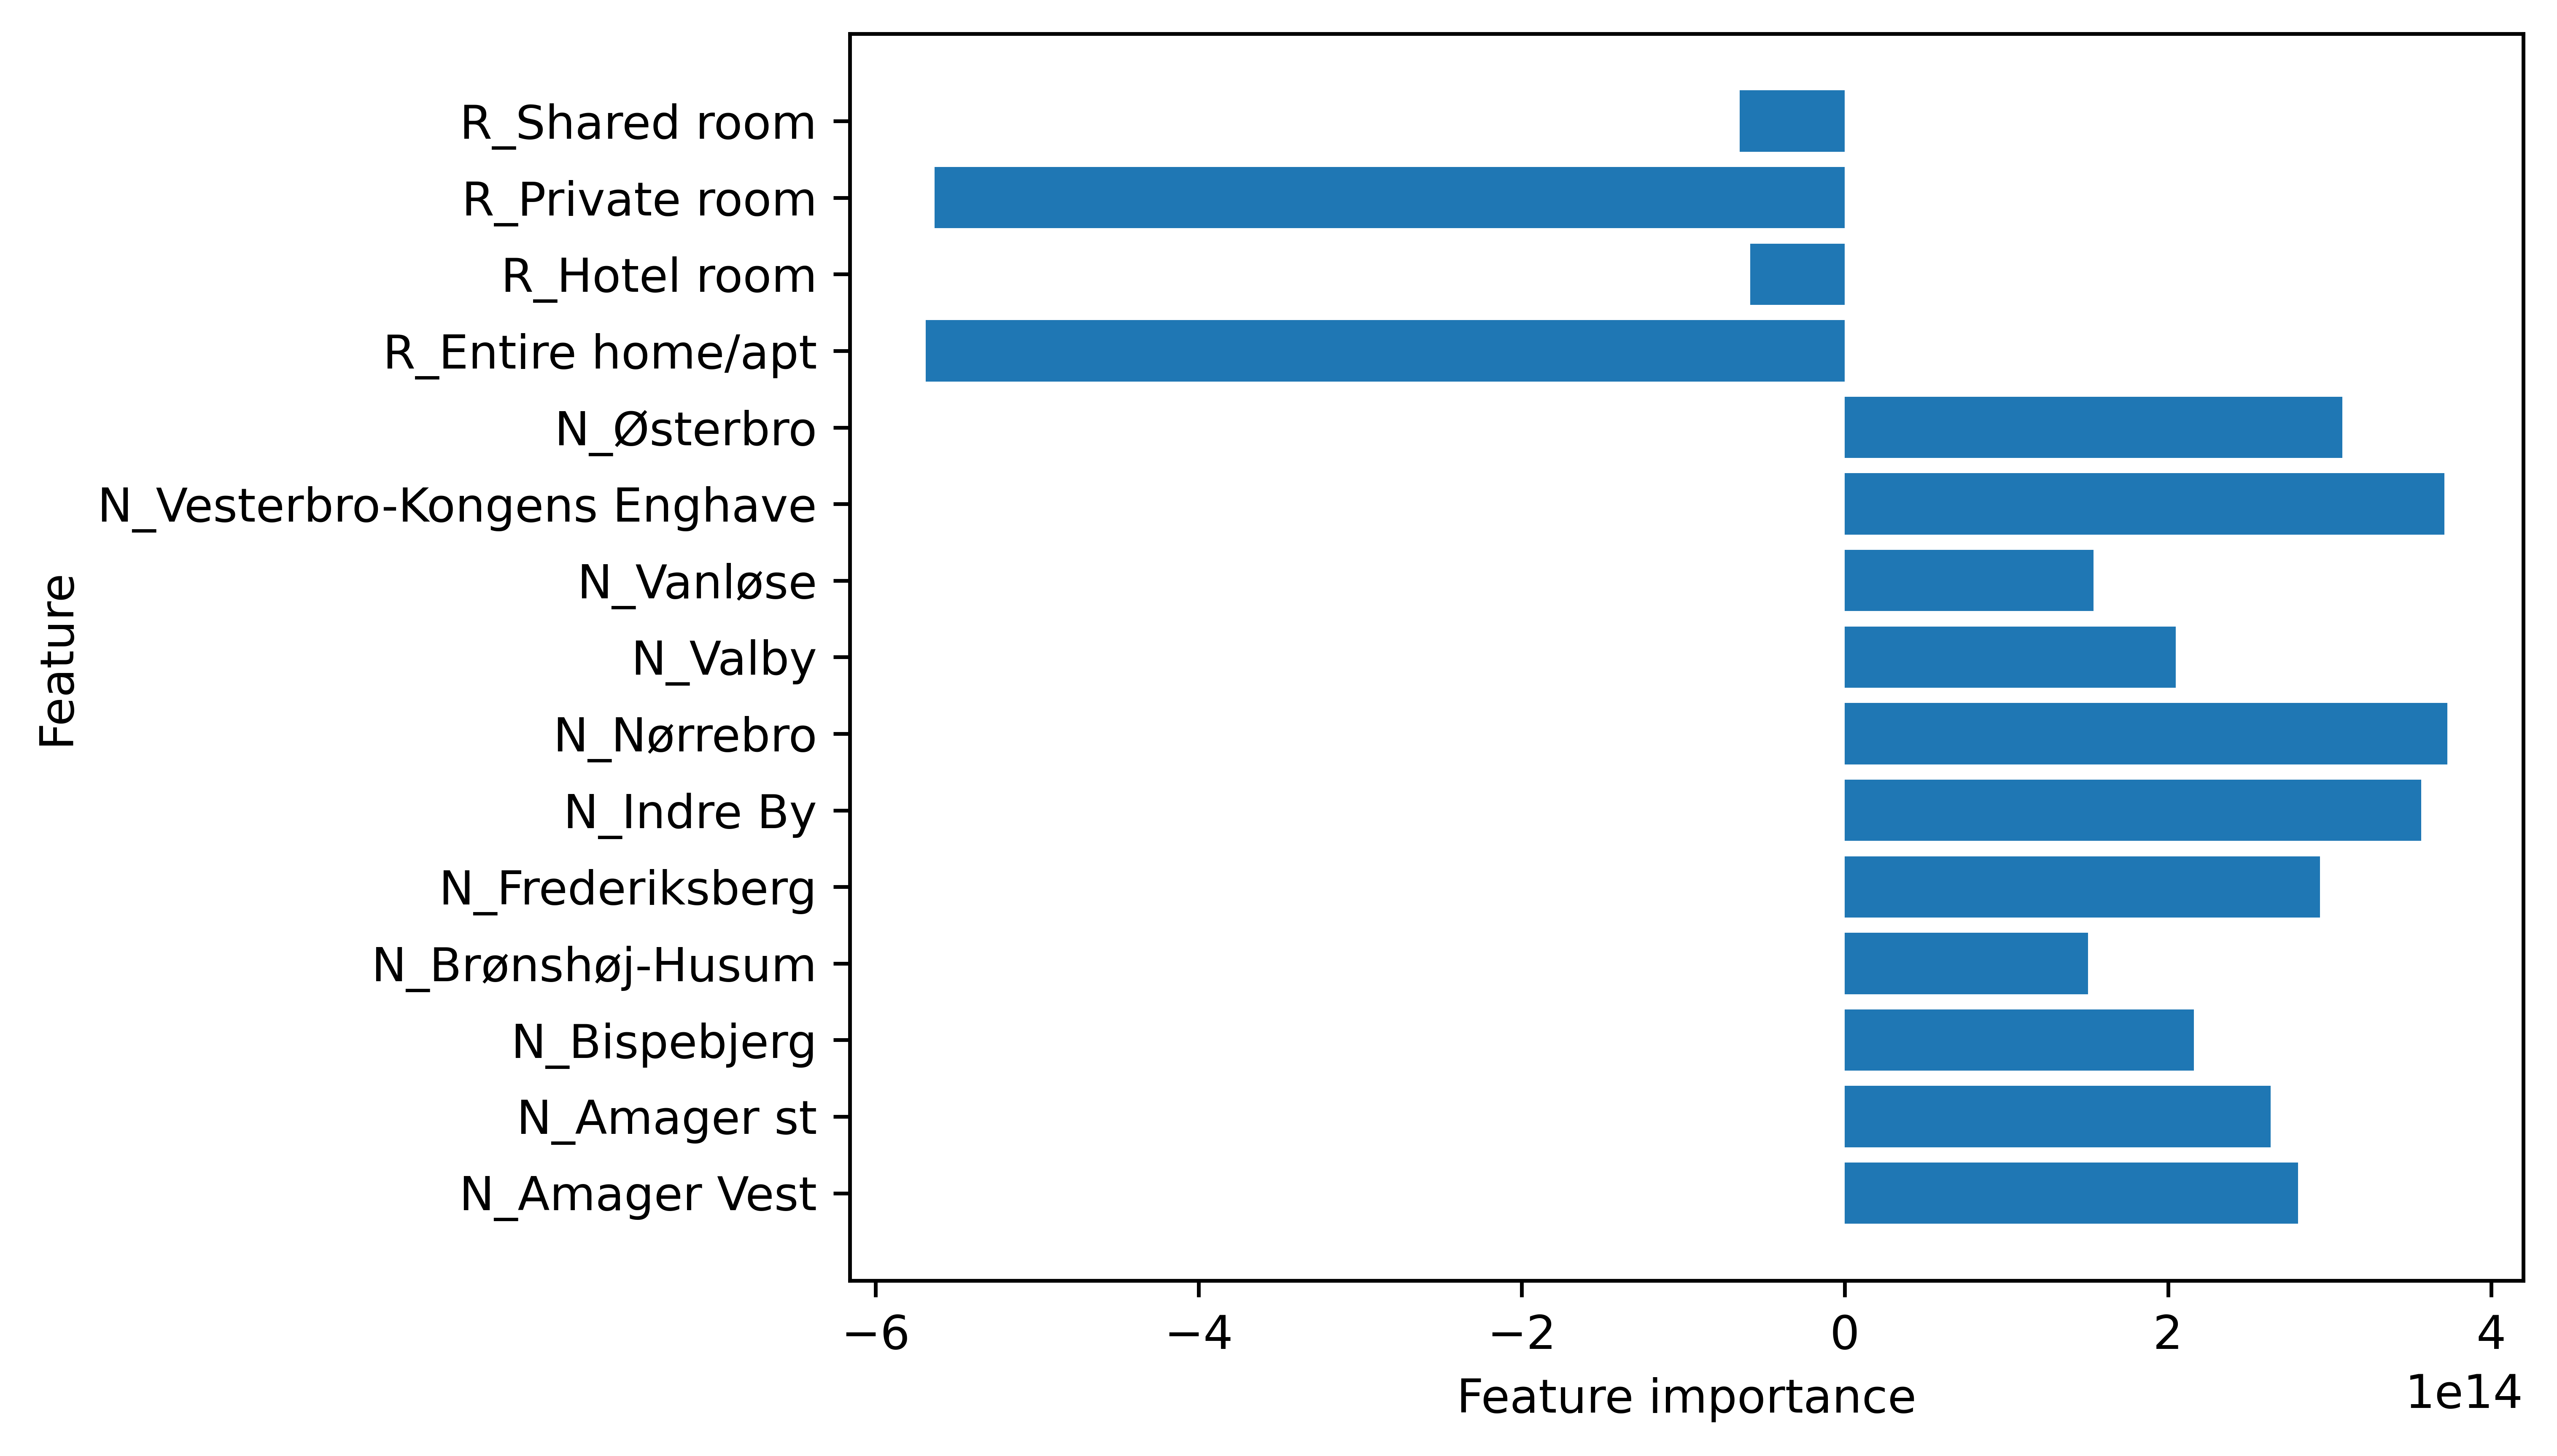

In [32]:
print("Intercept: {}".format(ols.intercept_))

n_features = len(ols.coef_)
plt.figure(dpi = 800)
plt.barh(range(n_features), ols.coef_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

# Ridge Regression
Ridge regression penalizes large coeffecients by a factor of α

In [33]:
from sklearn.linear_model import RidgeCV

# Calculating the alpha
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

np.float64(466.30167344161)

In [34]:
from sklearn.linear_model import Ridge

# Model with Ridge regression
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_train, y_train)
print("r^2 on train data is {}".format(ridge.score(X_train, y_train)))
print("r^2 on test data is {}".format(ridge.score(X_test, y_test)))

r^2 on train data is 0.04482207687141804
r^2 on test data is 0.05525739555971676


Ridge regression didn't score better

Intercept: 1158.0500853342924


Text(0, 0.5, 'Feature')

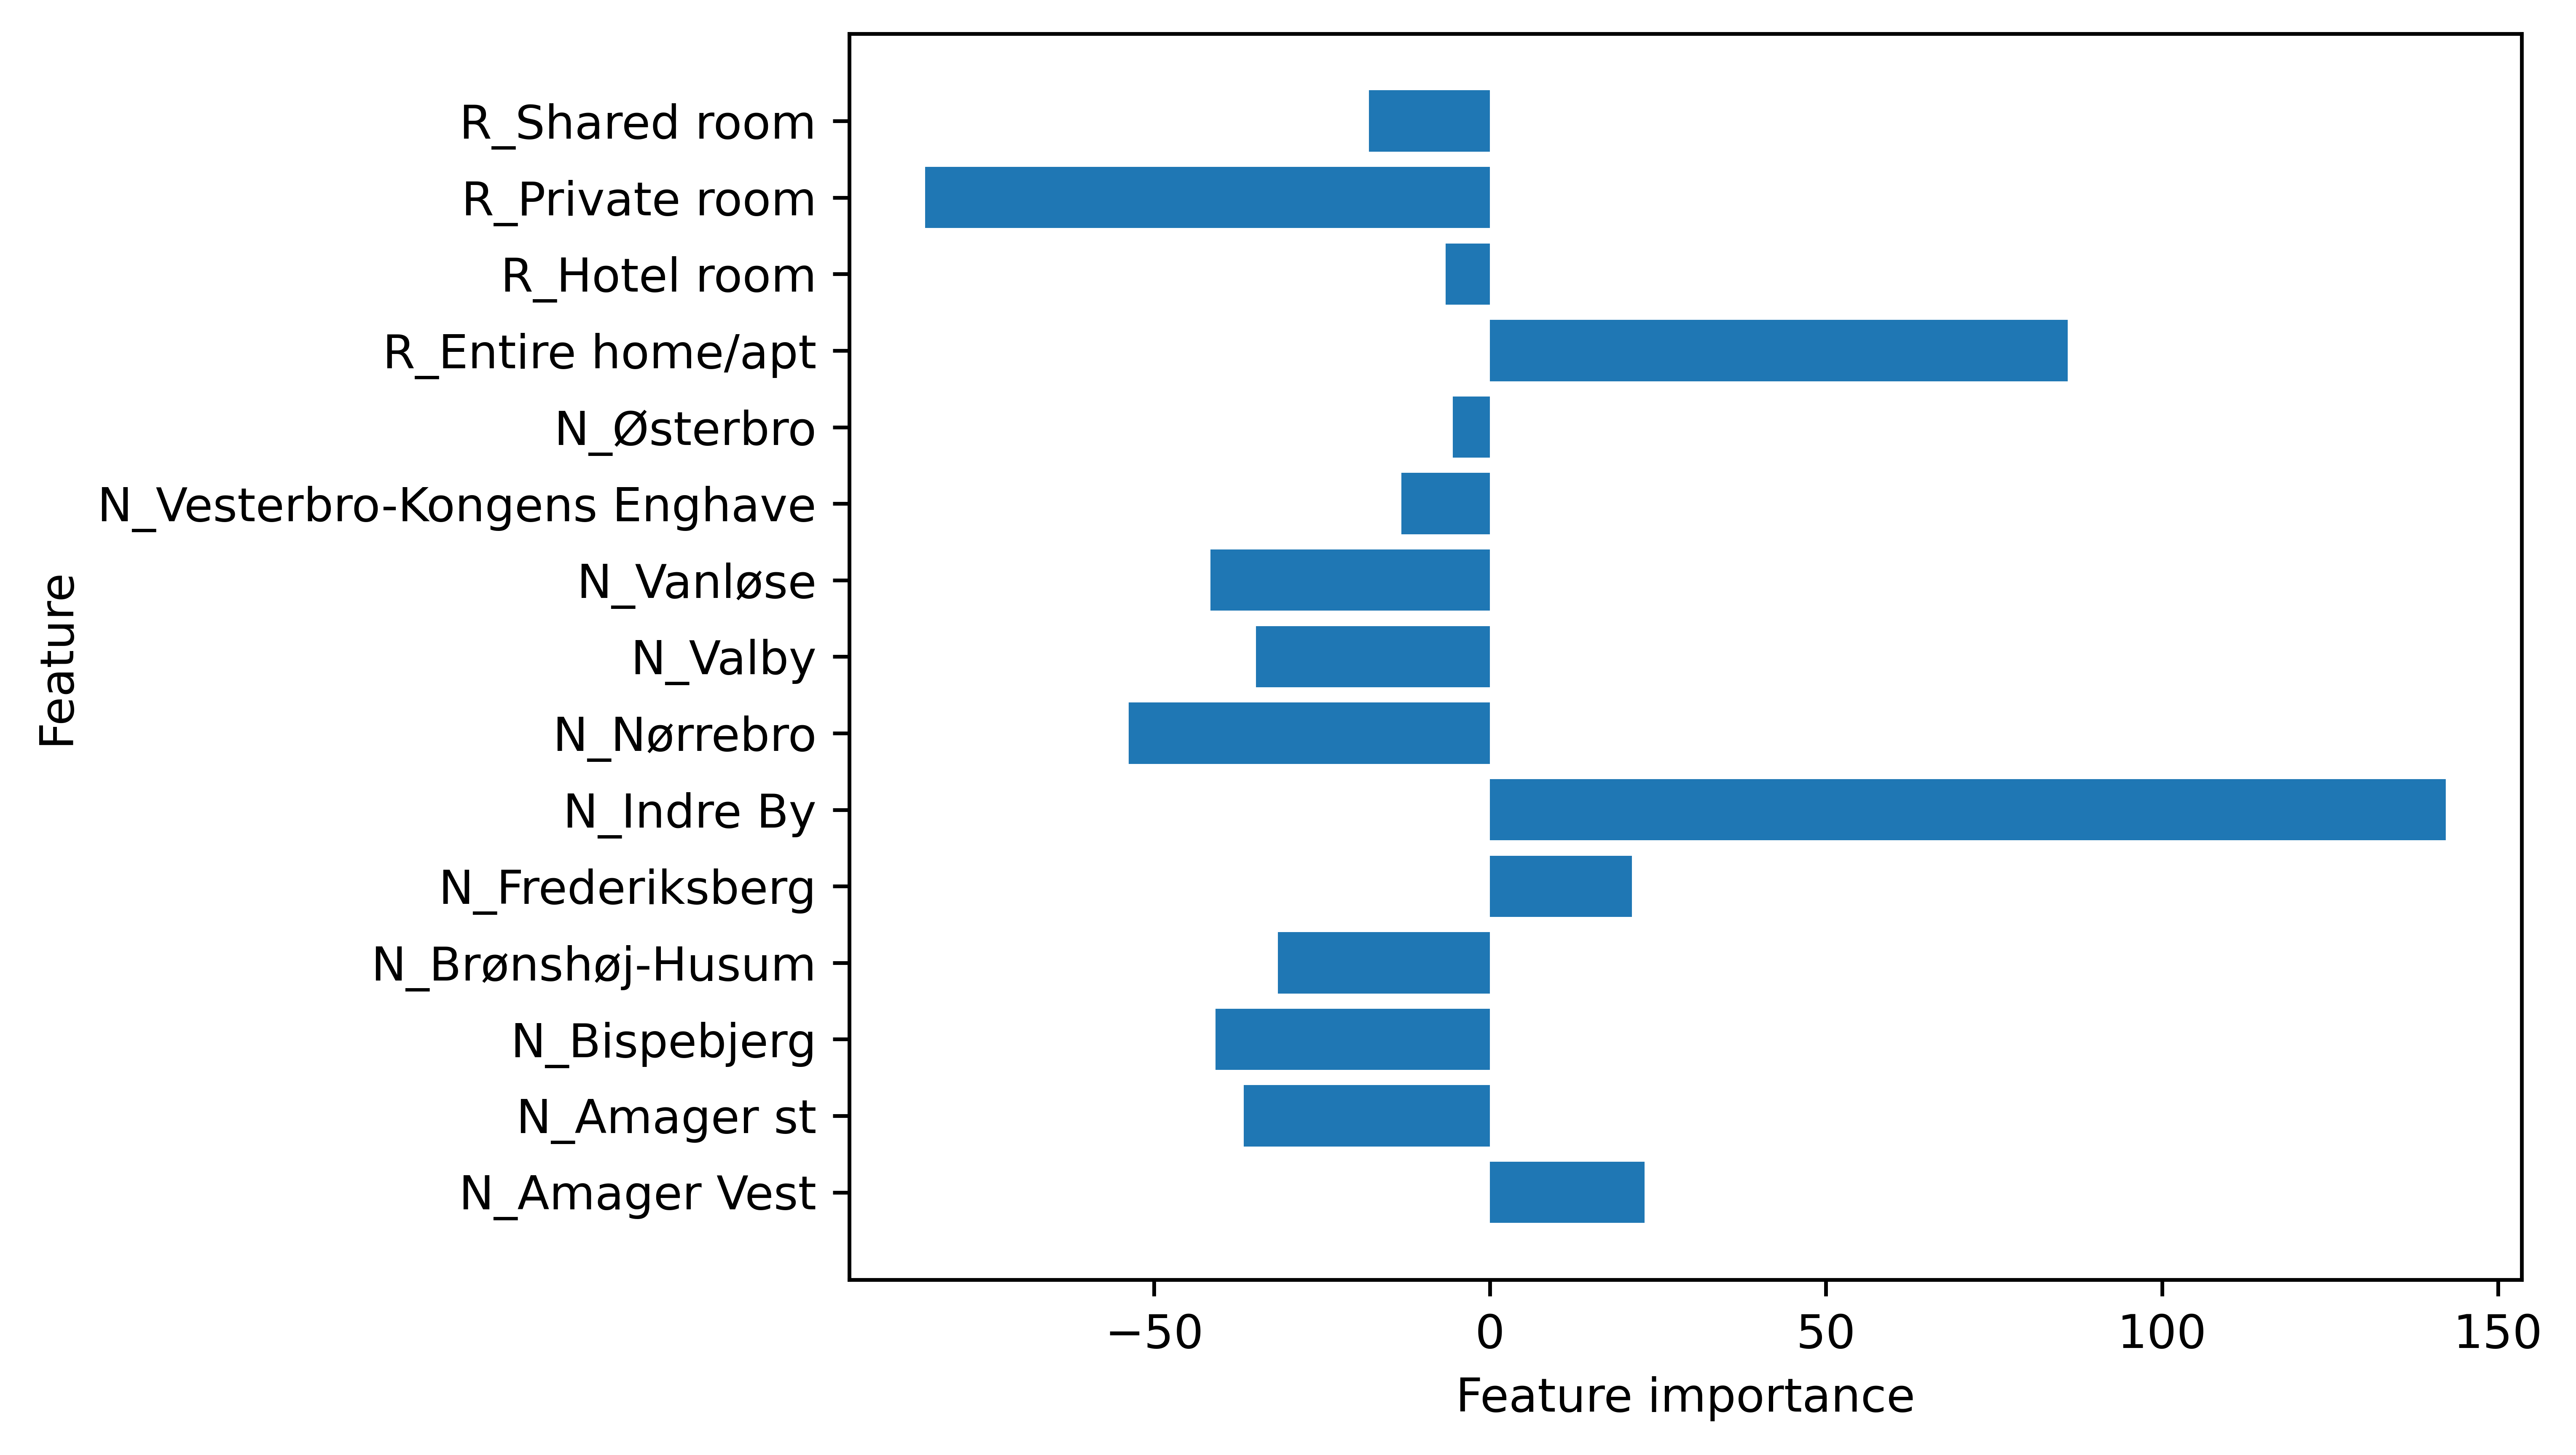

In [35]:
print("Intercept:", ridge.intercept_)

n_features = len(ridge.coef_)
plt.figure(dpi = 800)
plt.barh(range(n_features), ridge.coef_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

# Lasso 

In [36]:
from sklearn.linear_model import LassoCV, Lasso

lasso_cv = LassoCV(alphas = np.linspace(1, 40, 100))
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

np.float64(1.7878787878787878)

In [37]:

lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=100000)
lasso.fit(X_train, y_train)
print("r^2 on train data is {}".format(lasso.score(X_train, y_train)))
print("r^2 on test data is {}".format(lasso.score(X_test, y_test)))

r^2 on train data is 0.044851708242125476
r^2 on test data is 0.05495854432141323


Values are slightly closer, which menas less overfitting.

Intercept: 1159.3085200020723


Text(0, 0.5, 'Feature')

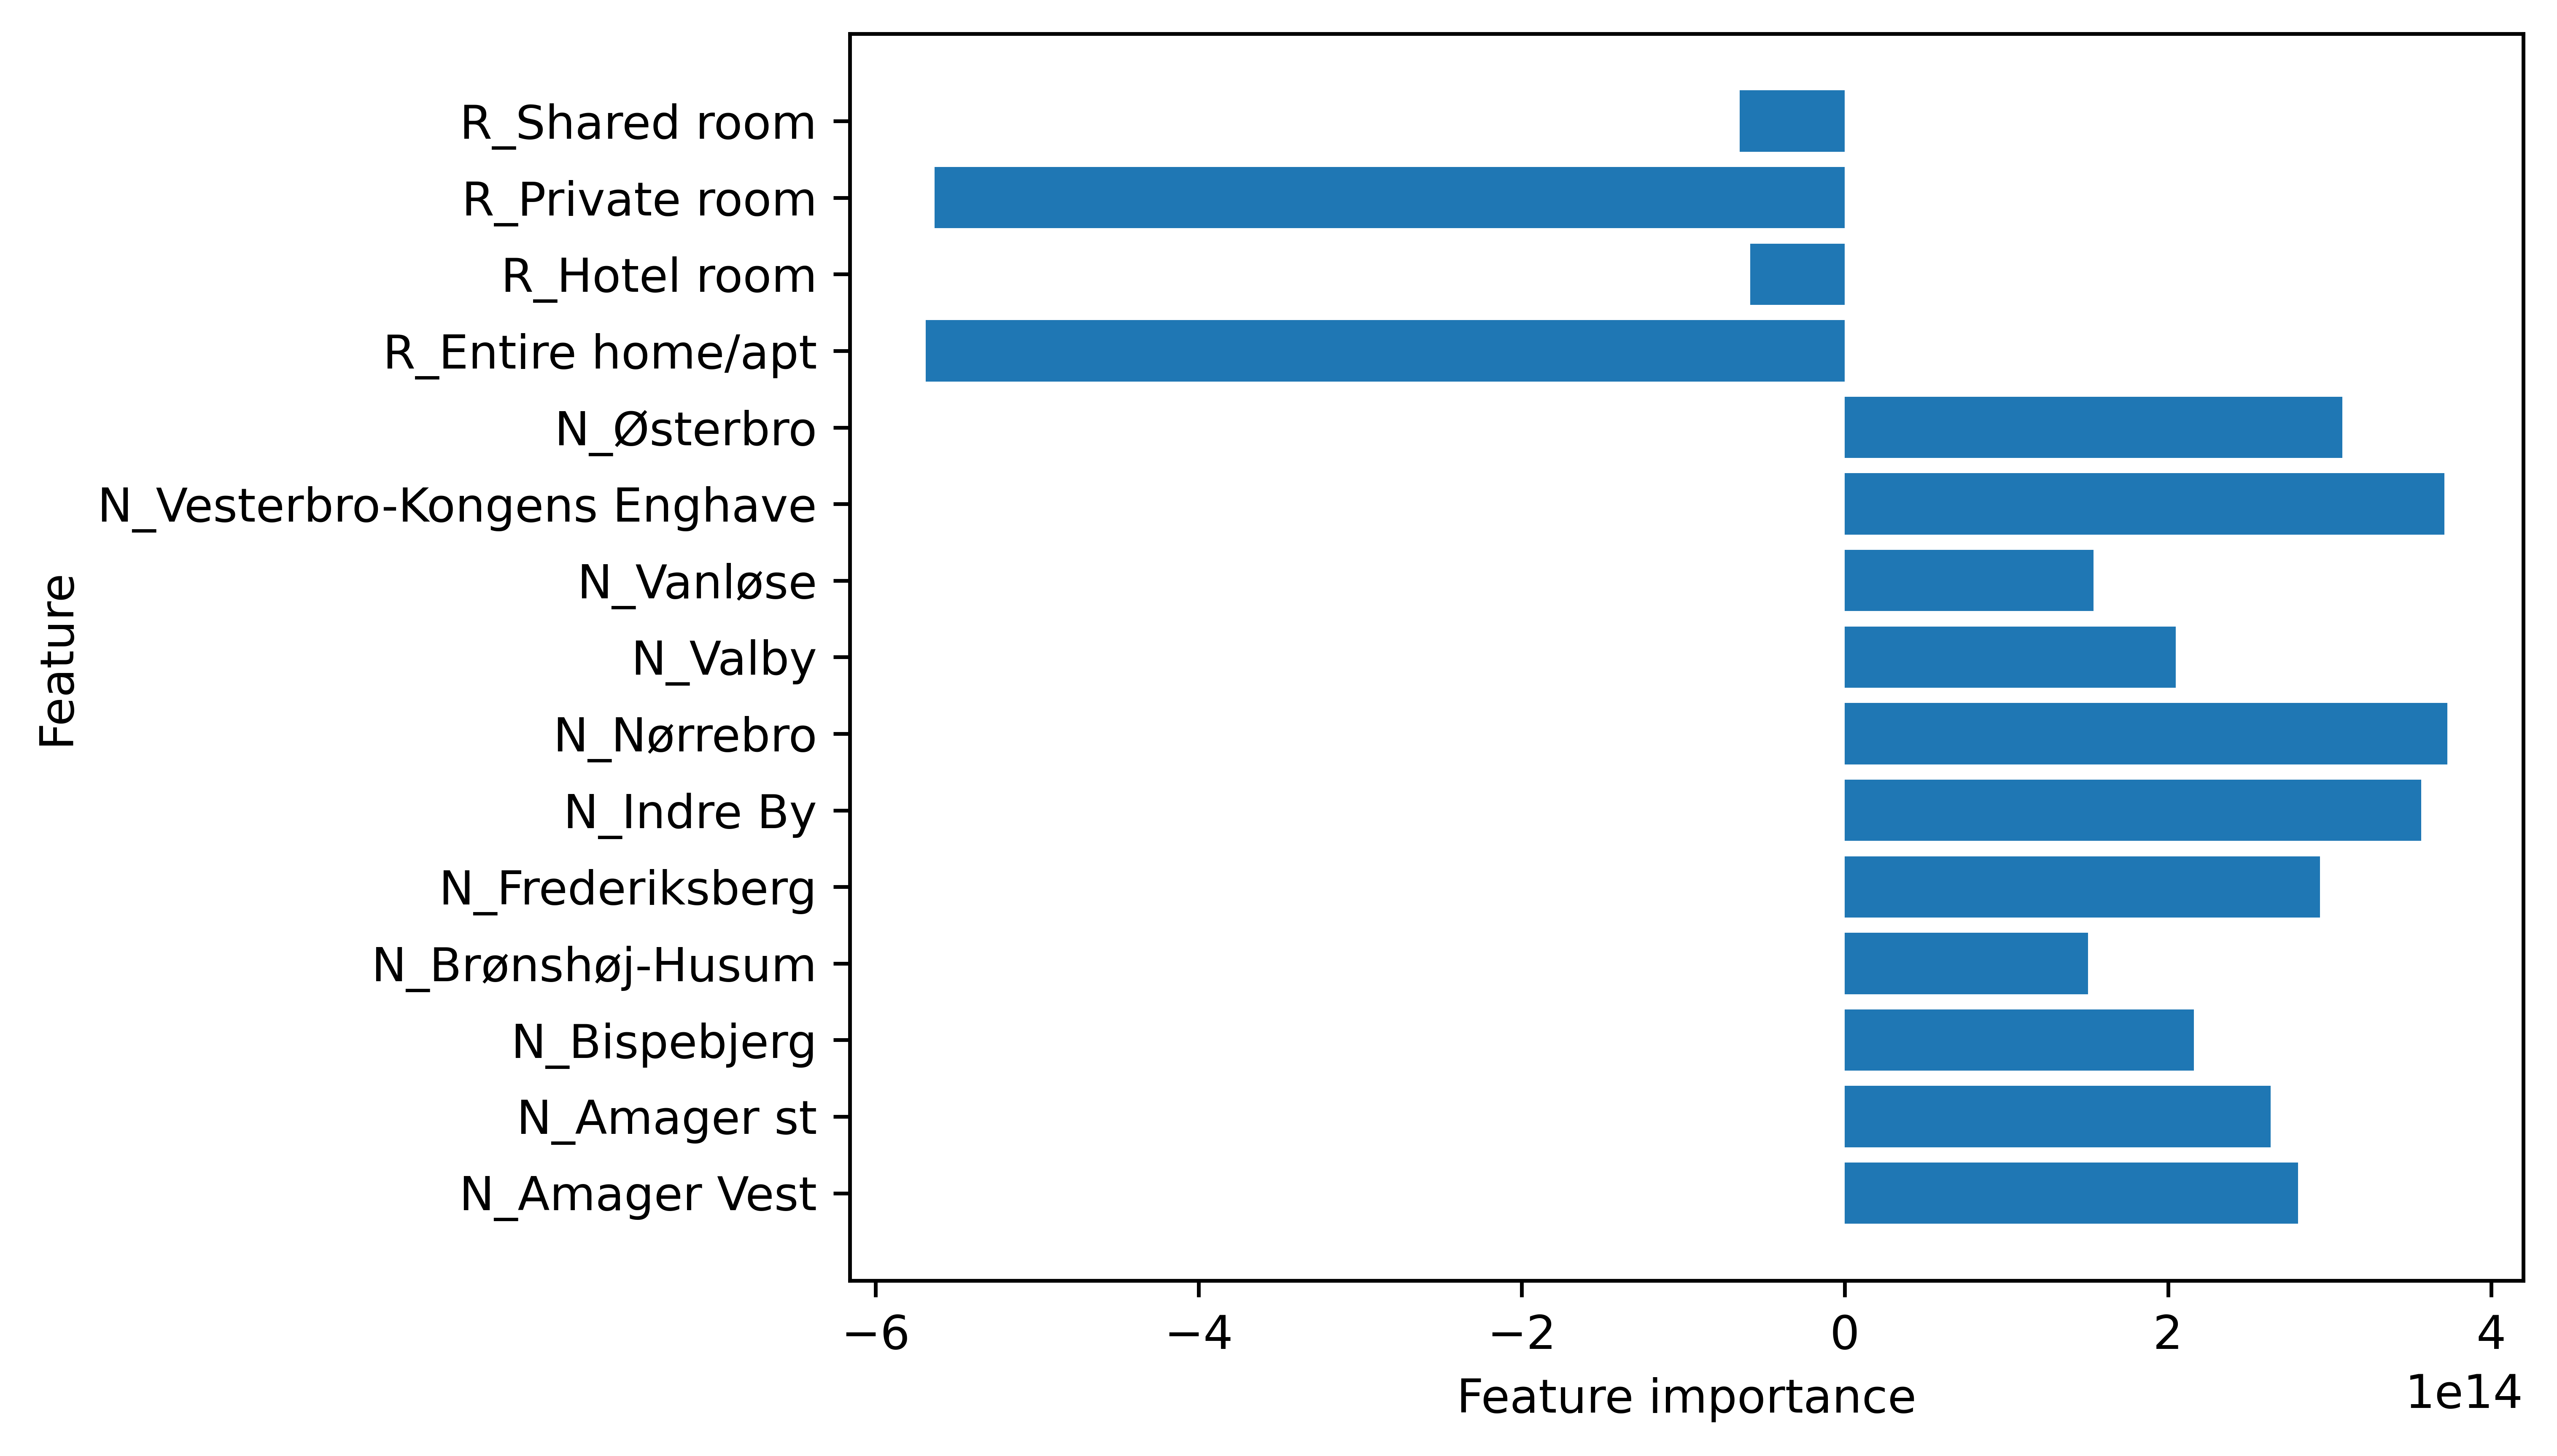

In [38]:
print("Intercept:", ols.intercept_)

n_features = len(ols.coef_)
plt.figure(dpi = 800)
plt.barh(range(n_features), ols.coef_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")